In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

GitHub link - https://github.com/also9275/Week3-cnn-cancer-detection-kaggle-mini-project

# 1. Description of problem
The main purpose of this competition is to try to classify pathology scans that have cancer or are benign. Training data has 220025 images and 103908 benign images + 89117 cancer images. Test data (images that we need to classify) has 57458 images. For this lab I'll plan to use CNN.

# 2. EDA and data import
let's download the dataset using "kaggle" command and unzip files

In [3]:
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.30G/6.31G [00:50<00:00, 216MB/s]
100% 6.31G/6.31G [00:50<00:00, 135MB/s]


In [4]:
import zipfile

# Unzip the archive
local_zip = '/content/histopathologic-cancer-detection.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

### let's create proper directory structure for our training, validation and test data

In [5]:
import os
base_dir = '/content'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


In [6]:
# check filenames
train_fnames = os.listdir(train_dir)

print(train_fnames[:10])

['114b10438a9a4606b8ac14d48ed1a92076bba054.tif', '5ec470c3f516d792bf521e159533d8d8d15d476d.tif', 'cf81483ff5c41be034f305ff6cc7701f1eb7c6b5.tif', '4b76fbaca8168d28a307b79ee342f3fd1a1d677c.tif', '0c8bf0f2a6c9ac986d9cf71d40d2d7d310601e6a.tif', 'f1b494a3df5e51ef41dc86e39c3ef55eee0d3f81.tif', '3650341c2e28c9a0fa2627a2cd6de9b33d364653.tif', 'e3f139a70615299265e7572a1e45904562be69f7.tif', '159f7ca2a855a8660e5dfe82b3ec572d2a0c6a01.tif', 'a3e6ba3a068b195fd3d04ad18f9b9ea10fd9f3c0.tif']


In [7]:
# next we will need to setup proper folder structure for CNN training; For this we will have train_dir and validation_dir
# and within these directories we will have cancer and benign subfolders
# First, let's read file with labels
from collections import defaultdict
labels = defaultdict(list)
with open("/content/train_labels.csv") as f:
  next(f)
  for line in f:
    line = line.rstrip()
    data = line.split(",")
    if data[1] == '1':
      label = 'cancer'
    else:
      label = 'benign'
    labels[label].append(data[0])

print(f"Cancer samples: {labels['cancer'][:1]}, total samples: {len(labels['cancer'])}")
print(f"Benign samples: {labels['benign'][:1]}, total samples: {len(labels['benign'])}")

Cancer samples: ['c18f2d887b7ae4f6742ee445113fa1aef383ed77'], total samples: 89117
Benign samples: ['f38a6374c348f90b587e046aac6079959adf3835'], total samples: 130908


In [8]:
# Create proper directories structure
os.makedirs(os.path.join(base_dir, "train", "train"))
os.makedirs(os.path.join(base_dir, "train", "validation"))

os.makedirs(os.path.join(base_dir, "train", "train", "cancer"))
os.makedirs(os.path.join(base_dir, "train", "train", "benign"))

os.makedirs(os.path.join(base_dir, "train", "validation", "cancer"))
os.makedirs(os.path.join(base_dir, "train", "validation", "benign"))

In [9]:
# Check directory structure
for rootdir, dirs, files in os.walk(os.path.join(base_dir, "train")):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/train/train
/content/train/validation
/content/train/train/benign
/content/train/train/cancer
/content/train/validation/benign
/content/train/validation/cancer


In [10]:
# Move files to proper directories
from shutil import move

for i in range(int(len(labels['cancer']) * 0.9)):
  if os.path.getsize(os.path.join(train_dir, f"{labels['cancer'][i]}.tif")) == 0:
    print(f"{labels['cancer'][i]}.tif is zero length, so ignoring.")
  else:
    move(os.path.join(train_dir, f"{labels['cancer'][i]}.tif"),
         os.path.join(train_dir, "train", "cancer", f"{labels['cancer'][i]}.tif"))

for i in range(int(len(labels['cancer']) * 0.9), len(labels['cancer'])):
  if os.path.getsize(os.path.join(train_dir, f"{labels['cancer'][i]}.tif")) == 0:
    print(f"{labels['cancer'][i]}.tif is zero length, so ignoring.")
  else:
    move(os.path.join(train_dir, f"{labels['cancer'][i]}.tif"),
         os.path.join(train_dir, "validation", "cancer", f"{labels['cancer'][i]}.tif"))

for i in range(int(len(labels['benign']) * 0.9)):
  if os.path.getsize(os.path.join(train_dir, f"{labels['benign'][i]}.tif")) == 0:
    print(f"{labels['benign'][i]}.tif is zero length, so ignoring.")
  else:
    move(os.path.join(train_dir, f"{labels['benign'][i]}.tif"),
         os.path.join(train_dir, "train", "benign", f"{labels['benign'][i]}.tif"))

for i in range(int(len(labels['benign']) * 0.9), len(labels['benign'])):
  if os.path.getsize(os.path.join(train_dir, f"{labels['benign'][i]}.tif")) == 0:
    print(f"{labels['benign'][i]}.tif is zero length, so ignoring.")
  else:
    move(os.path.join(train_dir, f"{labels['benign'][i]}.tif"),
         os.path.join(train_dir, "validation", "benign", f"{labels['benign'][i]}.tif"))

In [16]:
print(f"Total training cancer images: {len(os.listdir(os.path.join(train_dir, 'train', 'cancer')))}")
print(f"Total training benign images: {len(os.listdir(os.path.join(train_dir, 'train', 'benign')))}")

print(f"Total validation cancer images: {len(os.listdir(os.path.join(train_dir, 'validation', 'cancer')))}")
print(f"Total validation benign images: {len(os.listdir(os.path.join(train_dir, 'validation', 'benign')))}")

Total training cancer images: 80205
Total training benign images: 117817
Total validation cancer images: 8912
Total validation benign images: 13091


### now let's see how these images look like

In [13]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 4

pic_index = 0 # Index for iterating over images

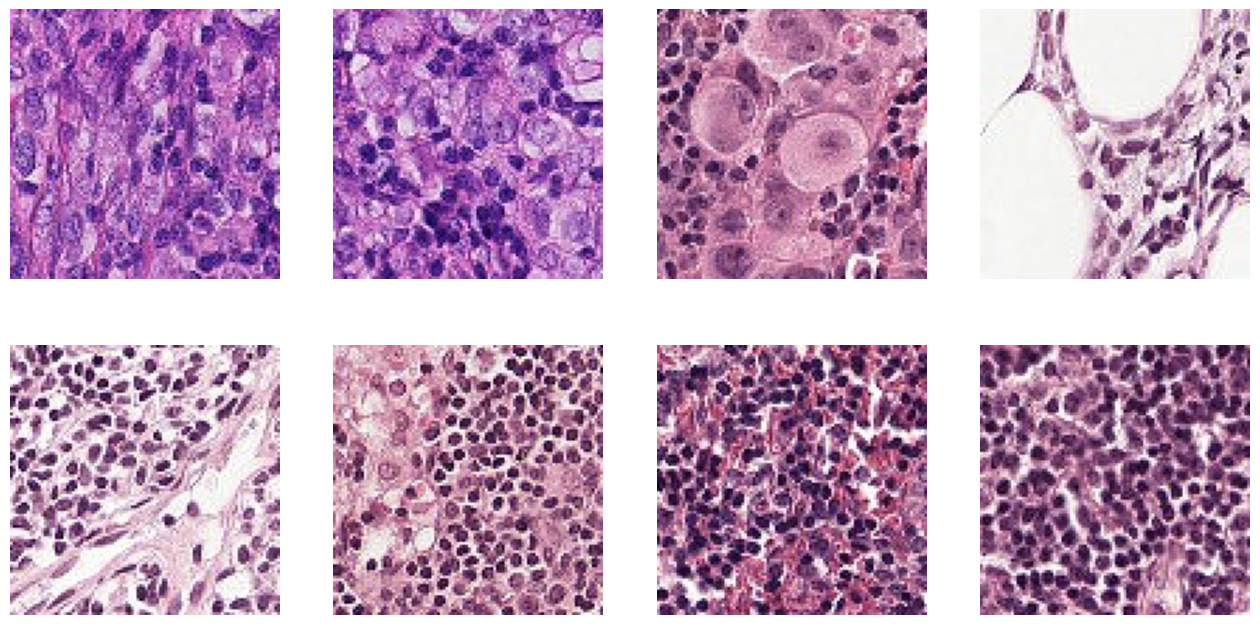

In [14]:
# Set up matplotlib fig, and size it to fit 4x4 pics
train_cancer_dir = os.path.join(train_dir, "train", "cancer")
train_benign_dir = os.path.join(train_dir, "train", "benign")

train_cancer_fnames = os.listdir(train_cancer_dir)
train_benign_fnames = os.listdir(train_benign_dir)

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_cancer_pix = [os.path.join(train_cancer_dir, fname)
                for fname in train_cancer_fnames[ pic_index-4:pic_index]]

next_benign_pix = [os.path.join(train_benign_dir, fname)
                for fname in train_benign_fnames[ pic_index-4:pic_index]]

for i, img_path in enumerate(next_cancer_pix + next_benign_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# 3. DModel Architecture and learning

### next step would be to create data generators using tensorflow library

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode="binary",
                                                      target_size=(33, 33))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode="binary",
                                                                target_size=(33, 33))
  return train_generator, validation_generator

In [36]:
TRAINING_DIR = os.path.join(train_dir, "train")
VALIDATION_DIR = os.path.join(train_dir, "validation")
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 198022 images belonging to 2 classes.
Found 22003 images belonging to 2 classes.


### let's specify our model. For model I'll use 2 Convolutional layers (with 16 and 32 filters, 2x2) and also 2 MaxPooling layers. After that I'll use Flatten layer to get vector representation of our data, Dense layer and final prediction layer with "sigmoid" activation function

In [37]:
import tensorflow as tf

def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(33, 33, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

  return model

In [38]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    steps_per_epoch=3960,
                    epochs=5,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=440)

Epoch 1/5
3960/3960 [==============================] - 273s 69ms/step - loss: 0.4605 - accuracy: 0.7861 - val_loss: 0.4135 - val_accuracy: 0.8126
Epoch 2/5
3960/3960 [==============================] - 278s 70ms/step - loss: 0.4073 - accuracy: 0.8165 - val_loss: 0.3766 - val_accuracy: 0.8330
Epoch 3/5
3960/3960 [==============================] - 280s 71ms/step - loss: 0.3853 - accuracy: 0.8303 - val_loss: 0.3635 - val_accuracy: 0.8401
Epoch 4/5
3960/3960 [==============================] - 271s 68ms/step - loss: 0.3716 - accuracy: 0.8378 - val_loss: 0.3686 - val_accuracy: 0.8353
Epoch 5/5
3960/3960 [==============================] - 290s 73ms/step - loss: 0.3601 - accuracy: 0.8442 - val_loss: 0.3733 - val_accuracy: 0.8380


# 4. Results and Analysis

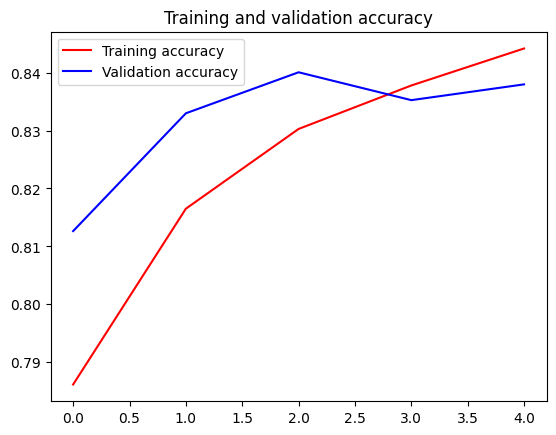

<Figure size 640x480 with 0 Axes>

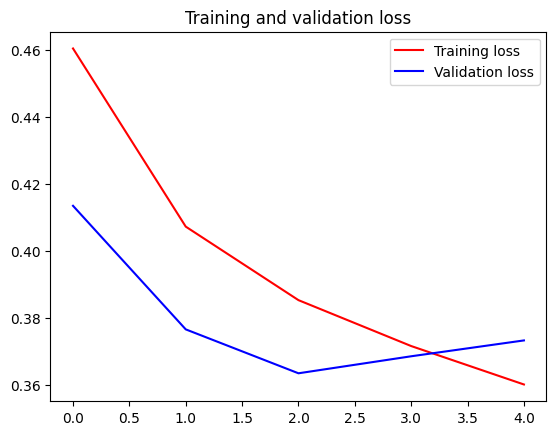

<Figure size 640x480 with 0 Axes>

In [40]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### As we can see from plots - our model can overfit to the training data. Anyway let's try to predict test samples and do a first submission.

In [53]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

predictions = dict()
images = list()
with open("/content/sample_submission.csv") as f:
  next(f)
  for line in f:
    line = line.rstrip()
    data = line.split(",")
    predictions[data[0]] = 0
    fn = f"{data[0]}.tif"

    path='/content/test/' + fn
    img=load_img(path, target_size=(33, 33))

    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images.append(x)

images = np.vstack(images)
classes = model.predict(images, batch_size=50)

1150/1150 [==============================] - 3s 2ms/step


In [56]:
for i, key in enumerate(predictions.keys()):
  predictions[key] = float(classes[i])

In [57]:
from google.colab import files
with open("samples_submission.csv", "w") as f:
  f.write("id,label\n")
  for id, label in predictions.items():
    f.write(f"{id},{label}\n")
files.download("samples_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
!kaggle competitions submit -c histopathologic-cancer-detection -f samples_submission.csv -m "First submission"

100% 3.32M/3.32M [00:01<00:00, 2.93MB/s]
Successfully submitted to Histopathologic Cancer Detection

### With first submission I got 0.8736 (public score) and 0.8199 (as private score). Not bad for just a smal CNN that were used for only 5 epochs. Now let's try to add data augmentation to our initial model and let's see if we can get better score

In [58]:
def train_val_generators_with_augmentation(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode="binary",
                                                      target_size=(33, 33))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode="binary",
                                                                target_size=(33, 33))
  return train_generator, validation_generator

In [59]:
train_generator, validation_generator = train_val_generators_with_augmentation(TRAINING_DIR, VALIDATION_DIR)

Found 198022 images belonging to 2 classes.
Found 22003 images belonging to 2 classes.


In [60]:
# Get the untrained model
model_aug = create_model()

# Train the model
# Note that this may take some time.
history_aug = model_aug.fit(train_generator,
                    steps_per_epoch=3960,
                    epochs=5,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=440)

Epoch 1/5
3960/3960 [==============================] - 589s 148ms/step - loss: 0.4805 - accuracy: 0.7743 - val_loss: 1.0148 - val_accuracy: 0.6340
Epoch 2/5
3960/3960 [==============================] - 540s 136ms/step - loss: 0.4401 - accuracy: 0.7975 - val_loss: 0.7181 - val_accuracy: 0.7157
Epoch 3/5
3960/3960 [==============================] - 543s 137ms/step - loss: 0.4229 - accuracy: 0.8084 - val_loss: 1.1181 - val_accuracy: 0.6373
Epoch 4/5
3960/3960 [==============================] - 547s 138ms/step - loss: 0.4111 - accuracy: 0.8142 - val_loss: 1.0337 - val_accuracy: 0.6224
Epoch 5/5
3960/3960 [==============================] - 542s 137ms/step - loss: 0.4035 - accuracy: 0.8198 - val_loss: 1.0182 - val_accuracy: 0.6333


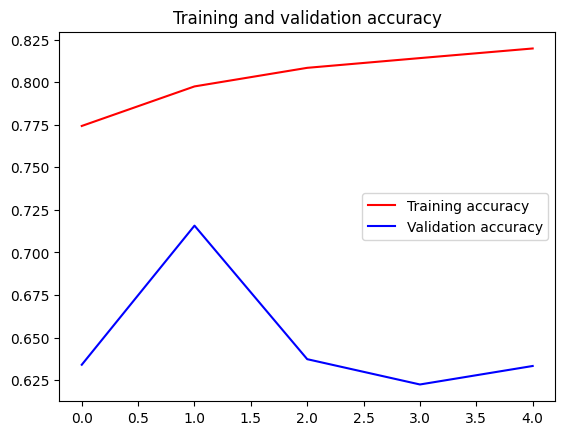

<Figure size 640x480 with 0 Axes>

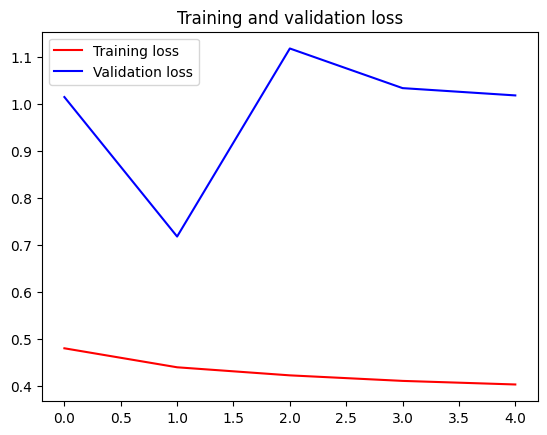

<Figure size 640x480 with 0 Axes>

In [61]:
# Plot the training and validation accuracies for each epoch

acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [62]:
predictions = dict()
images = list()
with open("/content/sample_submission.csv") as f:
  next(f)
  for line in f:
    line = line.rstrip()
    data = line.split(",")
    predictions[data[0]] = 0
    fn = f"{data[0]}.tif"

    path='/content/test/' + fn
    img=load_img(path, target_size=(33, 33))

    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images.append(x)

images = np.vstack(images)
classes = model_aug.predict(images, batch_size=50)

1150/1150 [==============================] - 3s 2ms/step


In [63]:
for i, key in enumerate(predictions.keys()):
  predictions[key] = float(classes[i])

In [64]:
from google.colab import files
with open("samples_submission_aug.csv", "w") as f:
  f.write("id,label\n")
  for id, label in predictions.items():
    f.write(f"{id},{label}\n")
files.download("samples_submission_aug.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
!kaggle competitions submit -c histopathologic-cancer-detection -f samples_submission_aug.csv -m "Second submission"

100% 3.36M/3.36M [00:01<00:00, 3.38MB/s]
Successfully submitted to Histopathologic Cancer Detection

### unfortunatelly second submission gave us not so good score of only 0.63. So I would suggest to stay with the first model

# 5. Conclusion

With only simple model that were used for 5 epochs we were able to get decent score. For a future I would suggest to try to add more convolutional and maxpooling layers and use 10 or 15 epochs for learning. With this approach we can get even better score